:::{.callout-info appearance="simple"}
For questions and/or suggestions regarding this notebook, please contact [Pieter Overdevest](https://www.linkedin.com/in/pieteroverdevest/) (pieter@innovatewithdata.nl).
:::

## Aim


In this exercise we explore principal Component Analysis (PCA) on USArrests data, see section '12.2.1 What Are Principal Components?' in ISLR ([Ed. 2, p. 501-503](https://hastie.su.domains/ISLR2/ISLRv2_website.pdf)).

## Initialization

We start by importing a few packages,

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from numpy.random import rand

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

random.seed(10)

Note, '%matplotlib inline' ensures matplotlib graphs will be included in your notebook.

In [14]:
%matplotlib inline

## A. Data loading and pre-processing


### 1. Load the USArrests data in a Pandas data frame, determine the dimensions of the data frame, and show the first five rows.

Make use of https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/USArrests.csv. The USArrests dataset consists of five features - 'Unnamed: 0' (state name), and statistics on 'Murder', 'Assault', 'UrbanPop', and 'Rape'. Each row represents the data for a state, there are 50 rows for 50 states.

In [15]:
df_data_original = pd.read_csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/USArrests.csv")

ps_y             = df_data_original['Unnamed: 0']

# Show the dimensions:
print(df_data_original.shape)

# Show the first 5 lines:
df_data_original.head(5)

(50, 5)


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### 2. Remove column `Unnamed: 0` (state names) from the data frame. Call the resulting data frame: `df_X`.

In [16]:
df_X = df_data_original.drop('Unnamed: 0', axis = 1)

### 3. Create an object holding the feature names in `df_X`.

In [17]:
v_df_X_names = df_X.columns
v_df_X_names

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

### 4. Create an object holding the standardized data in `df_X` and check the result by observing the first five rows.

In [18]:
m_X_scaled = StandardScaler().fit_transform(df_X)

m_X_scaled[0:5,]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

## B. PCA preparation and Biplot

### 1. Create a PCA object with as many principal components as there are columns in data frame `df_X`.

In [19]:
# Number of features in original data.
n_components = df_X.shape[1]

# Print results.
print(f"Number of features in the original data: {n_components}")

# Create pca object.
pca_ = PCA(n_components = n_components)

Number of features in the original data: 4


### 2. Calculate the principal components from the scaled data using the PCA object and put them in a data frame with headers `PC1`, `PC2`, ... Check the result by observing the first five rows.

In [20]:
# Principal components (PC's).
m_pc = pca_.fit_transform(m_X_scaled)

# Header names.
l_pc_names = ["PC" + str(i+1) for i in range(n_components)]

print(l_pc_names)

# Put PC's in data frame.
df_pc = pd.DataFrame(

    data    = m_pc,
    columns = l_pc_names
)

# Show first five rows.
df_pc.head(5)

['PC1', 'PC2', 'PC3', 'PC4']


,PC1,PC2,PC3,PC4
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996


### 3. Obtain the loadings from the fitted PCA object. Put them in a data frame with the same header names as in `df_X`. Set the indices of the rows to `PC1`, `PC2`, … How does your table compare to Table 12.1 in ISLR (Ed 2)? Can you explain any differences?

In [21]:
df_loadings = pd.DataFrame(
    
    data    = pca_.components_,
    columns = v_df_X_names,
    index   = l_pc_names
)

#df_loadings
df_loadings.transpose()

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [22]:
# Let's take a moment to discuss the `components_` attribute of the `pca_` object, see below. This attribute results
# in an array containing the so-called 'loadings', see section '12.2.1 What Are Principal Components?' in ISLR
# ([Ed. 2](https://hastie.su.domains/ISLR2/ISLRv2_website.pdf)).

# We transpose and compare the data frame to Table 12.1 in ISLR (Ed. 2). We observe in Table 12.1 that the values for
# PC2 have an opposite sign of what we find in our calculation. PCA is simply a mathematical transformation. If you
# change the signs of the components (score), you do not change the variance that is contained in it. Moreover, the
# loadings then also change sign, so the interpretation stays exactly the same
# ([ref](https://stats.stackexchange.com/questions/88880/does-the-sign-of-scores-or-of-loadings-in-pca-or-fa-have-a-meaning-may-i-revers)).
# We will also observe that the biplot is flipped in the PC2 direction compared to Figure 12.1; as we will see in the next exercise.

### 4. Create a biplot. What does it mean when states are close to each other in the biplot? What do the arrows generally indicate?

Typically, biplots plot the first principal component against the second principal component. 

In [23]:
# Data being close in the biplot means that they are similar; contain similar information.

# The arrows indicate the loadings of the first and second principal component.

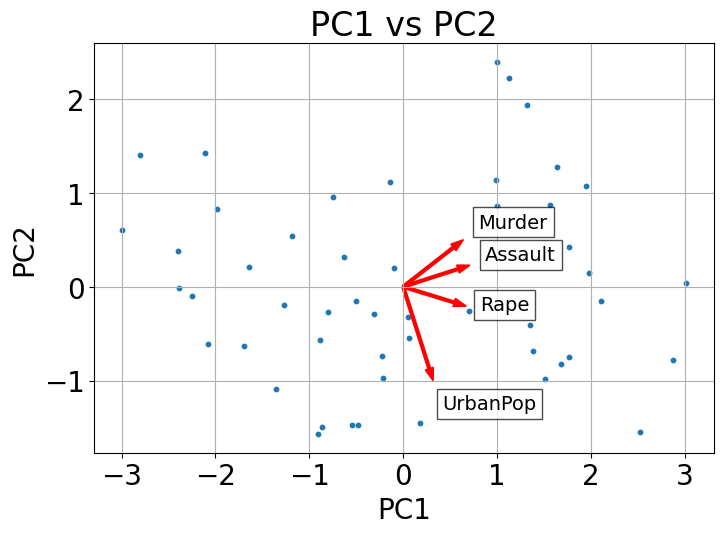

In [24]:
# The two principal components in a biplot show clusters of observations based on their similarity. Data closer to each other are more similar.
# Loadings - indicated by the arrows - show how strongly each feature influences a principal component.

# See also e.g., https://statisticsglobe.com/biplot-pca-python

# Initialization
fig, ax = plt.subplots(figsize = (8,8))

plt.xlabel('PC1', fontsize = 20)
plt.ylabel('PC2', fontsize = 20)
plt.title('PC1 vs PC2', fontsize = 24)
plt.tick_params(labelsize = 20)
ax.set_aspect('equal')

# principal components.
ax.scatter(
    x     = df_pc.PC1,
    y     = df_pc.PC2,     
    s     = 10,
    alpha = 1
)

# Loading vectors.
for colname in df_loadings:

    n_dx = df_loadings[colname][0]
    n_dy = df_loadings[colname][1]

    # Arrow
    ax.arrow(
        x     = 0,
        y     = 0,
        dx    = n_dx,
        dy    = n_dy,
        color = 'r',
        width = 0.03
    )

    # Text label
    ax.text(
        x        = n_dx*1.5,
        y        = n_dy*1.5,
        s        = colname,
        fontsize = 14,
        bbox     = {'facecolor': 'white', 'alpha': 0.7}
    )

ax.grid();

## C. What does it means that

### 1. `Murder` and `Assault` arrows point in the same direction?

If you do not have an answer readily available, continue, check the correlation heat map below, and give it another go.


In [25]:
# That they are correlated, contain similar information, influence the PC's in a similar way. See loadings.

### 2. `UrbanPop` arrow points almost orthogonally to `Murder` and `Assault`?

In [26]:
# That they are uncorrelated, contain dissimilar information, influence the PC's in dissimilar way.

## D. Explained variance (ratio)

### 1. Obtain the explained variance and explained variance ratio for the four principal components from the fitted PCA object. Why is the explained ratio of the fourth principal component so small?

In [27]:
pca_.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [28]:
pca_.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [29]:
# The explained ratio of the fourth PC is small because two features are highly correlated.
# So, the majority of the information can be captured in three PCs.

### 2. Create a Scree plot and plot the accumulated explained variance ratio for each principle component

The explained variance is plotted in a so-called Scree plot. It displays - in the form of a bar chart - how much variation each principal component is able to capture from the data.

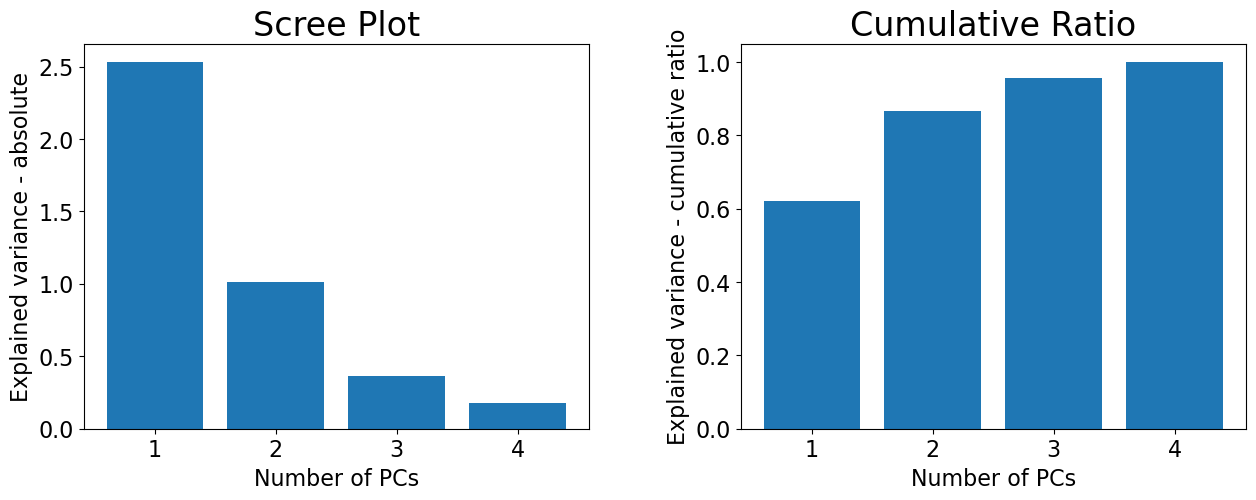

In [30]:
# Initialization
fig, ax = plt.subplots(figsize = (15,5))
fig.subplots_adjust(wspace = 0.3) 

# To prevent deprecation warning.
ax.remove()

# Scree Plot
plt.subplot(1,2,1)
plt.xlabel('Number of PCs', fontsize = 16)
plt.ylabel('Explained variance - absolute', fontsize = 16)
plt.title('Scree Plot', fontsize = 24)
plt.tick_params(labelsize = 16)
plt.bar(range(1, n_components+1), pca_.explained_variance_)

# Cumulative ratio
plt.subplot(1,2,2)
plt.xlabel('Number of PCs', fontsize = 16)
plt.ylabel('Explained variance - cumulative ratio', fontsize = 16)
plt.title('Cumulative Ratio', fontsize = 24)
plt.tick_params(labelsize = 16)
plt.bar(range(1, n_components+1), np.cumsum(pca_.explained_variance_ratio_));

## E. Correlations


### 1. Create a heat map showing the correlations between the features in `df_X`. What do you observe and how does it explain the directions of the arrows in the biplot? Does it matter whether the data in `df_X` is scaled or not?

In [31]:
# Assault and Murder are highly correlated. UrbanPop and Murder/Assault are uncorrelated.

# Scaling has no influence on the correlation between features. That's a good thing!
# We would not want that to change when optimizing ML models.

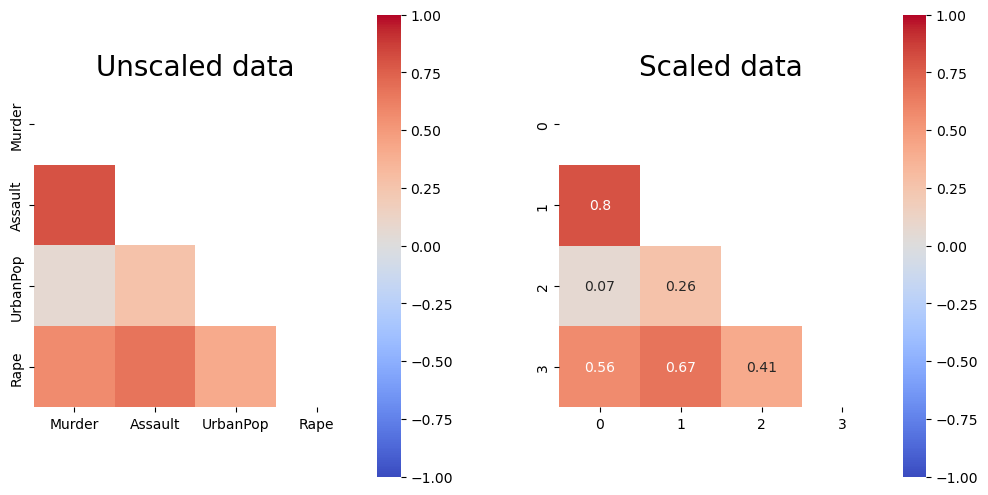

In [34]:
fig, ax = plt.subplots(figsize = (12,6))
fig.subplots_adjust(wspace = 0.3) 

# To prevent deprecation warning.
ax.remove()

plt.subplot(1,2,1)
plt.title("Unscaled data", fontsize=20)
df_cor = df_X.corr()
matrix = np.triu(df_cor)
sns.heatmap(df_cor, square=True, cmap= 'coolwarm', mask = matrix, vmin = -1, vmax = 1, annot=True);

plt.subplot(1,2,2)
plt.title("Scaled data", fontsize=20)
df_cor = pd.DataFrame(m_X_scaled).corr()
matrix = np.triu(df_cor)
sns.heatmap(df_cor, square=True, cmap= 'coolwarm', mask = matrix, vmin = -1, vmax = 1, annot=True);

### 2. Create a heat map showing the correlations between the principal components. What do you observe and what does it confirm on the key property of principal components?

In [48]:
# By design the principal components are constructed such that all components are orthogonal
# (perpendicular) to each other.
# We confirm this by calculating the correlations between each pair of PCs.

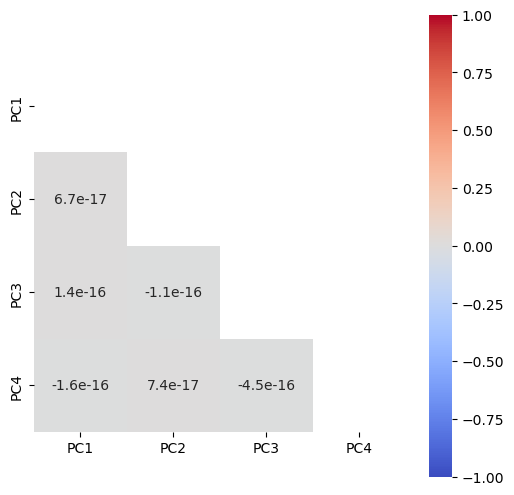

In [35]:
plt.rcParams['figure.figsize'] = (6, 6)

df_cor = df_pc.corr()
matrix = np.triu(df_cor)
sns.heatmap(df_cor, square=True, cmap= 'coolwarm', mask = matrix, vmin = -1, vmax = 1, annot=True);